In [1]:
import math
import pandas as pd
from numpy import sqrt
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import tensorflow as tf

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [2]:
X_test = np.load('X_test.npy')

In [3]:
y_test = pd.read_csv('y_test.csv')
y_test.head()

,Amplitudes,Frequencies,Daping coeffitients,Speeds
0,0.880872,15.942382,6.535301,-1.016214
1,0.444304,57.443045,9.377057,1.848360
2,1.309435,44.808915,6.877844,-5.630539
3,3.145914,84.409868,9.877931,7.270011
4,2.846638,83.682527,2.003107,-5.025999


In [4]:
y_test.rename(columns={'Amplitudes': 'ampl', 'Frequencies': 'freq', 'Daping coeffitients': 'damp', 'Speeds': 'speed'}, inplace=True)

ampl      3.561127
freq     95.559154
damp      6.940742
speed    -5.651902
Name: 5, dtype: float64


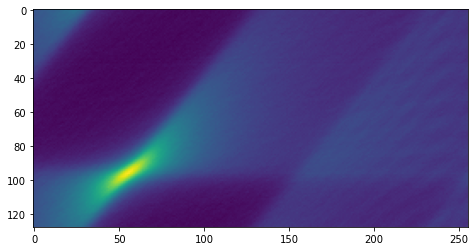

In [5]:
print(y_test.iloc[5])
plt.figure(figsize=(10,4))
plt.imshow(X_test[5].T)
plt.show()

ampl       2.589355
freq     107.386998
damp       9.256726
speed      5.271206
Name: 189, dtype: float64


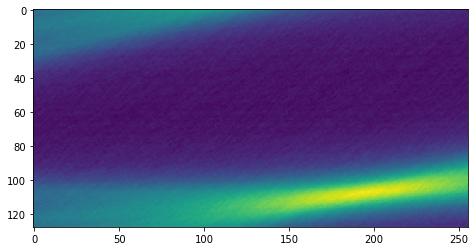

In [6]:
print(y_test.iloc[189])
plt.figure(figsize=(10,4))
plt.imshow(X_test[189].T)
plt.show()

In [7]:
y_test.iloc[:10]

,ampl,freq,damp,speed
0,0.880872,15.942382,6.535301,-1.016214
1,0.444304,57.443045,9.377057,1.848360
2,1.309435,44.808915,6.877844,-5.630539
3,3.145914,84.409868,9.877931,7.270011
4,2.846638,83.682527,2.003107,-5.025999
5,3.561127,95.559154,6.940742,-5.651902
6,2.409922,117.115739,8.289137,4.046034
7,4.202801,53.693314,3.670882,-3.883816
8,3.139044,12.394763,6.784808,-5.998959
9,2.123878,71.640627,6.638801,-6.199460


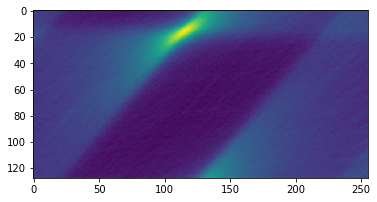

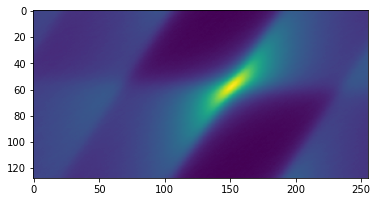

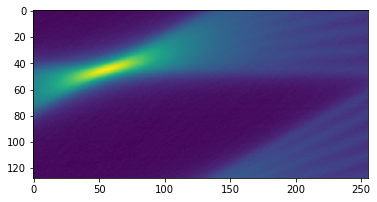

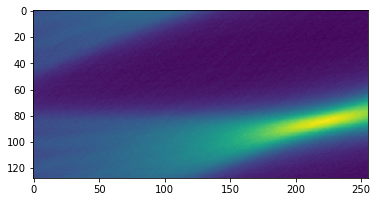

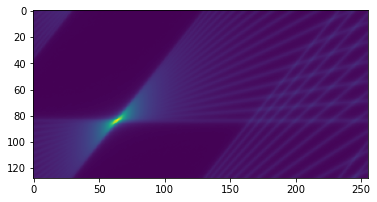

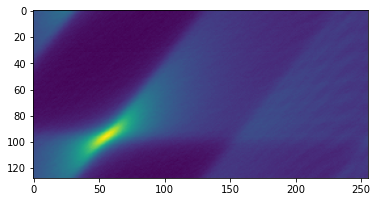

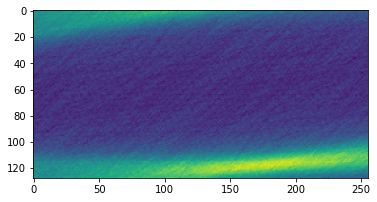

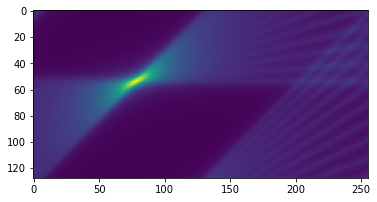

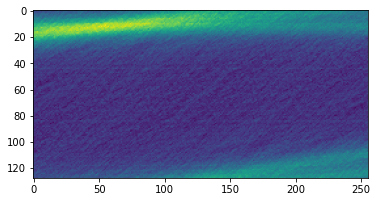

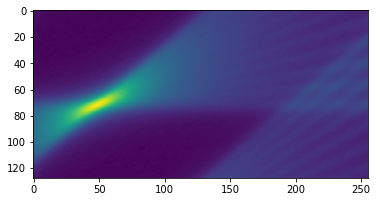

In [317]:
for element in X_test[:10]:
    plt.imshow(element.T)
    plt.show()

In [7]:
X_test = (X_test - 18.439472) / 25.953499

In [8]:
modelNMR = tf.keras.models.load_model('NMRmodel.model')

In [9]:
y_pred = modelNMR.predict(X_test)

In [153]:
amp_pred, freq_pred, damp_pred, speed_pred = y_pred

In [154]:
amp_pred = (amp_pred * 1.3739507) + 2.5182393 
freq_pred = (freq_pred * 31.369093) + 64.331924
damp_pred = (damp_pred * 2.8327253) + 5.200225
speed_pred = (speed_pred * 4.654785) + 0.07005237

In [155]:
y_pred_ampl = pd.DataFrame(amp_pred, columns=['ampl_pred'])
y_pred_freq = pd.DataFrame(freq_pred, columns=['freq_pred'])
y_pred_damp = pd.DataFrame(damp_pred, columns=['damp_pred'])
y_pred_speed = pd.DataFrame(speed_pred, columns=['speed_pred'])

In [156]:
df_y_pred = y_pred_ampl.join(y_pred_freq).join(y_pred_damp).join(y_pred_speed)

In [157]:
df_y_pred.shape

(1000, 4)

In [158]:
df_y_pred

,ampl_pred,freq_pred,damp_pred,speed_pred
0,0.707653,27.452217,5.140474,-0.725524
1,0.398577,57.217445,9.199495,2.113752
2,1.253779,46.104080,6.675013,-5.418082
3,3.051126,84.733162,9.368336,7.573500
4,2.824581,83.579178,1.889377,-4.867330
...,...,...,...,...
995,0.664562,97.383102,0.778739,4.379015
996,1.795255,91.293938,8.580794,-4.146006
997,2.460800,115.629807,7.710910,-0.522513
998,4.069752,48.016106,7.637817,7.224609


In [159]:
# df_y_pred.to_csv('df_y_pred.csv', index=False)

In [160]:
# new_df_y_pred = pd.read_csv('df_y_pred.csv')

In [161]:
mseAmp = mean_squared_error(y_test['ampl'], df_y_pred['ampl_pred'])
print("MSEampl: %.4f" % (mseAmp))
mseFreq = mean_squared_error(y_test['freq'], df_y_pred['freq_pred'])
print("MSEfreq: %.4f" % (mseFreq))
mseDamp = mean_squared_error(y_test['damp'], df_y_pred['damp_pred'])
print("MSEdamp: %.4f" % (mseDamp))
mseSpeed = mean_squared_error(y_test['speed'], df_y_pred['speed_pred'])
print("MSEspeed: %.4f" % (mseSpeed))

MSEampl: 0.0658
MSEfreq: 18.7404
MSEdamp: 0.8728
MSEspeed: 0.4086


In [162]:
rmseAmp = np.sqrt(mean_squared_error(y_test['ampl'], df_y_pred['ampl_pred']))
print("RMSEampl: %.4f" % (rmseAmp))
rmseFreq = np.sqrt(mean_squared_error(y_test['freq'], df_y_pred['freq_pred']))
print("RMSEfreq: %.4f" % (rmseFreq))
rmseDamp = np.sqrt(mean_squared_error(y_test['damp'], df_y_pred['damp_pred']))
print("RMSEdamp: %.4f" % (rmseDamp))
rmseSpeed = np.sqrt(mean_squared_error(y_test['speed'], df_y_pred['speed_pred']))
print("RMSEspeed: %.4f" % (rmseSpeed))

RMSEampl: 0.2564
RMSEfreq: 4.3290
RMSEdamp: 0.9342
RMSEspeed: 0.6392


In [163]:
maeAmp = mean_absolute_error(y_test['ampl'], df_y_pred['ampl_pred'])
print("MAEampl: %.4f" % (rmseAmp))
maeFreq = mean_absolute_error(y_test['freq'], df_y_pred['freq_pred'])
print("MAEfreq: %.4f" % (maeFreq))
maeDamp = mean_absolute_error(y_test['damp'], df_y_pred['damp_pred'])
print("MAEdamp: %.4f" % (maeDamp))
maeSpeed = mean_absolute_error(y_test['speed'], df_y_pred['speed_pred'])
print("MAEspeed: %.4f" % (maeSpeed))

MAEampl: 0.2564
MAEfreq: 2.4708
MAEdamp: 0.5612
MAEspeed: 0.3566


In [164]:
textamp = '\n'.join((r'mse=%.4f' % (mseAmp), r'rmse=%.4f' % (rmseAmp), r'mae=%.4f' % (maeAmp)))
textfreq = '\n'.join((r'mse=%.4f' % (mseFreq), r'rmse=%.4f' % (rmseFreq), r'mae=%.4f' % (maeFreq)))
textdamp = '\n'.join((r'mse=%.4f' % (mseDamp), r'rmse=%.4f' % (rmseDamp), r'mae=%.4f' % (maeDamp)))
textspeed = '\n'.join((r'mse=%.4f' % (mseSpeed), r'rmse=%.4f' % (rmseSpeed), r'mae=%.4f' % (maeSpeed)))

In [165]:
y_test100 = y_test[:200]
y_test100.shape

(200, 4)

In [166]:
df_y_pred100 = df_y_pred[:200]
df_y_pred100.shape

(200, 4)

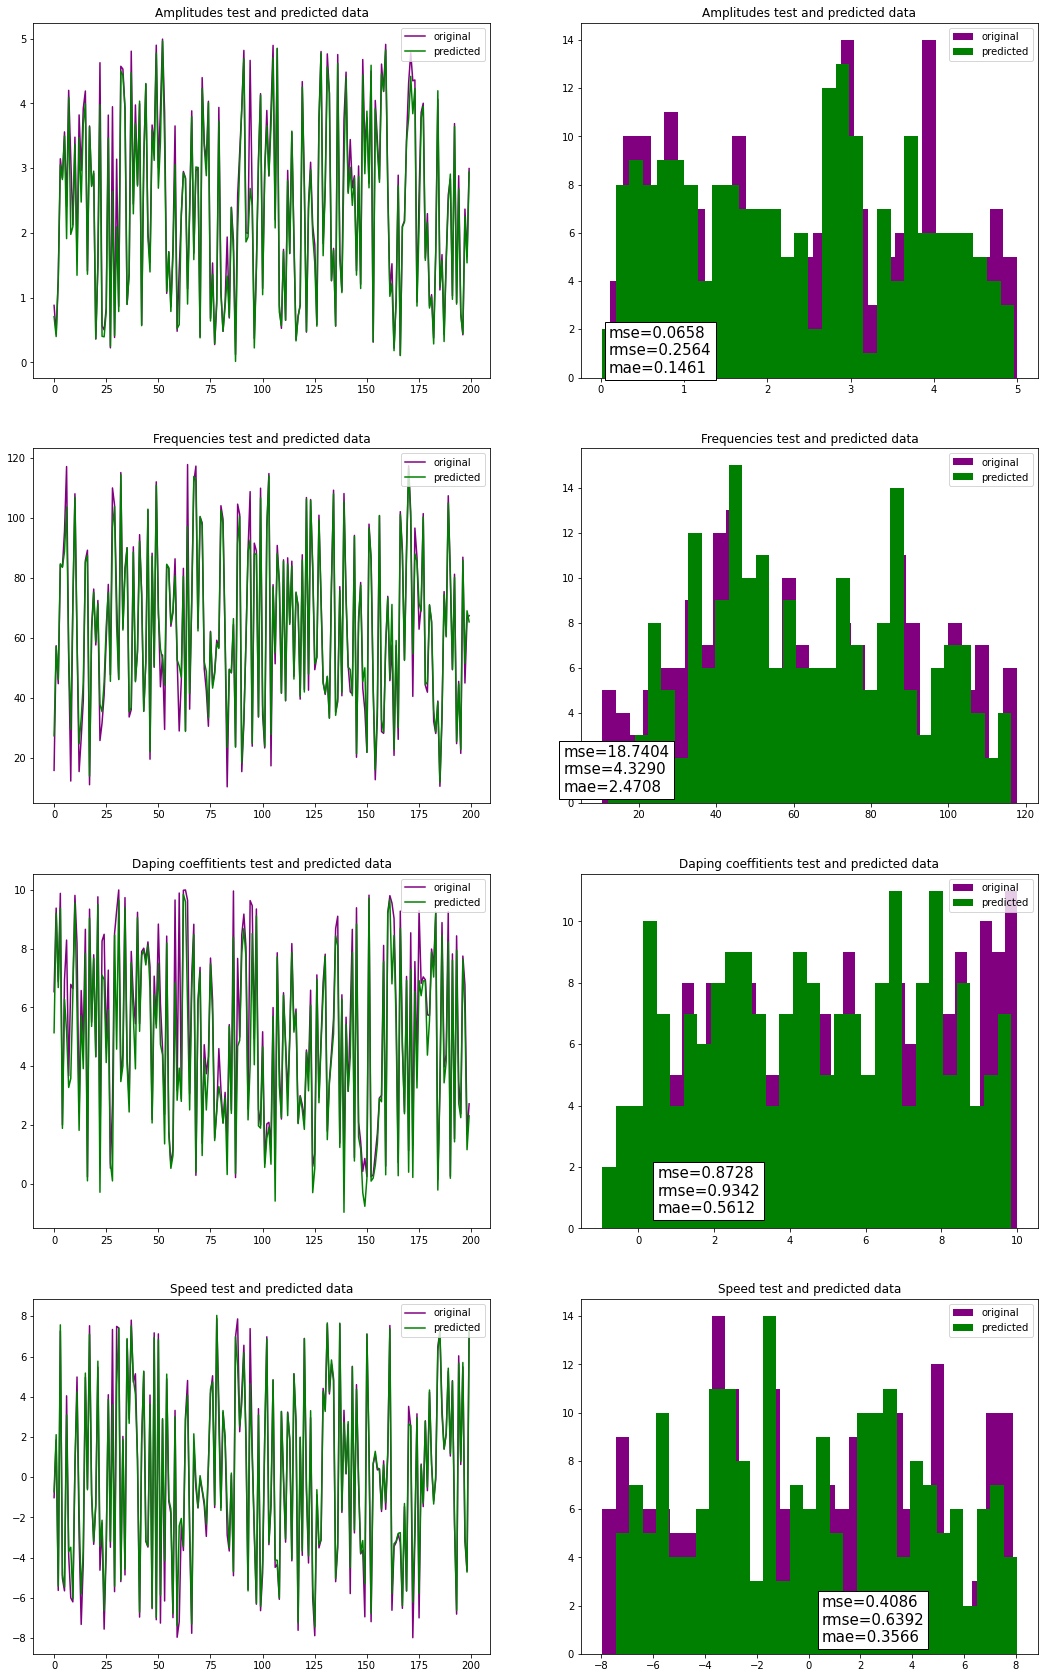

In [183]:
fig, axes = plt.subplots(4, 2, figsize=(18,30))
ax = axes[0][0]
ax.plot(range(len(y_test100)), y_test100['ampl'], label="original", color='purple')
ax.plot(range(len(y_test100)), df_y_pred100['ampl_pred'], label="predicted", color='green')
ax.set_title("Amplitudes test and predicted data")
ax.legend(loc='upper right')
ax = axes[0][1]
ax.hist(y_test100['ampl'], bins=30, label='original', color='purple')
ax.hist(df_y_pred100['ampl_pred'], bins=30, label='predicted', color='green')
ax.set_title("Amplitudes test and predicted data")
ax.legend(loc='upper right')
ax.text(0.1, 0.2, textamp, fontsize=15, bbox=dict(facecolor='white', edgecolor='black'))

ax = axes[1][0]
ax.plot(range(len(y_test100)), y_test100['freq'], label="original", color='purple')
ax.plot(range(len(y_test100)), df_y_pred100['freq_pred'], label="predicted", color='green')
ax.set_title("Frequencies test and predicted data")
ax.legend(loc='upper right')
ax = axes[1][1]
ax.hist(y_test100['freq'], bins=30, label='original', color='purple')
ax.hist(df_y_pred100['freq_pred'], bins=30, label='predicted', color='green')
ax.set_title("Frequencies test and predicted data")
ax.legend(loc='upper right')
ax.text(0.5, 0.5, textfreq, fontsize=15, bbox=dict(facecolor='white', edgecolor='black'))

ax = axes[2][0]
ax.plot(range(len(y_test100)), y_test100['damp'], label="original", color='purple')
ax.plot(range(len(y_test100)), df_y_pred100['damp_pred'], label="predicted", color='green')
ax.set_title("Daping coeffitients test and predicted data")
ax.legend(loc='upper right')
ax = axes[2][1]
ax.hist(y_test100['damp'], bins=30, label='original', color='purple')
ax.hist(df_y_pred100['damp_pred'], bins=30, label='predicted', color='green')
ax.set_title("Daping coeffitients test and predicted data")
ax.legend(loc='upper right')
ax.text(0.5, 0.5, textdamp, fontsize=15, bbox=dict(facecolor='white', edgecolor='black'))

ax = axes[3][0]
ax.plot(range(len(y_test100)), y_test100['speed'], label="original", color='purple')
ax.plot(range(len(y_test100)), df_y_pred100['speed_pred'], label="predicted", color='green')
ax.set_title("Speed test and predicted data")
ax.legend(loc='upper right')
ax = axes[3][1]
ax.hist(y_test100['speed'], bins=30, label='original', color='purple')
ax.hist(df_y_pred100['speed_pred'], bins=30, label='predicted', color='green')
ax.set_title("Speed test and predicted data")
ax.legend(loc='upper right')
ax.text(0.5, 0.5, textspeed, fontsize=15, bbox=dict(facecolor='white', edgecolor='black'))

plt.savefig('plot1.png', dpi=200)
plt.show()

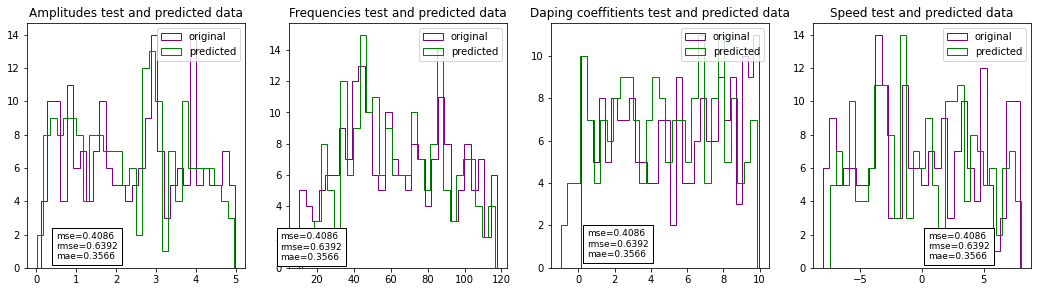

In [184]:
fig, axes = plt.subplots(1,4, figsize=(18, 4.5))
ax = axes[0]
ax.hist(y_test100['ampl'], bins=30, histtype='step', label='original', color='purple')
ax.hist(df_y_pred100['ampl_pred'], bins=30, histtype='step', label='predicted', color='green')
ax.set_title("Amplitudes test and predicted data")
ax.legend(loc='upper right')
ax.text(0.5, 0.5, textspeed, fontsize=9, bbox=dict(facecolor='white', edgecolor='black'))

ax = axes[1]
ax.hist(y_test100['freq'], bins=30, histtype='step', label='original', color='purple')
ax.hist(df_y_pred100['freq_pred'], bins=30, histtype='step', label='predicted', color='green')
ax.set_title("Frequencies test and predicted data")
ax.legend(loc='upper right')
ax.text(0.5, 0.5, textspeed, fontsize=9, bbox=dict(facecolor='white', edgecolor='black'))

ax = axes[2]
ax.hist(y_test100['damp'], bins=30, histtype='step', label='original', color='purple')
ax.hist(df_y_pred100['damp_pred'], bins=30, histtype='step', label='predicted', color='green')
ax.set_title("Daping coeffitients test and predicted data")
ax.legend(loc='upper right')
ax.text(0.5, 0.5, textspeed, fontsize=9, bbox=dict(facecolor='white', edgecolor='black'))

ax = axes[3]
ax.hist(y_test100['speed'], bins=30, histtype='step', label='original', color='purple')
ax.hist(df_y_pred100['speed_pred'], bins=30, histtype='step', label='predicted', color='green')
ax.set_title("Speed test and predicted data")
ax.legend(loc='upper right')
ax.text(0.5, 0.5, textspeed, fontsize=9, bbox=dict(facecolor='white', edgecolor='black'))

plt.savefig('plot2.png', dpi=200)
plt.show()

In [169]:
deltaampl = pd.DataFrame((df_y_pred['ampl_pred'] - y_test['ampl']), columns=['deltaampl'])
deltafreq = pd.DataFrame((df_y_pred['freq_pred'] - y_test['freq']), columns=['deltafreq'])
deltadamp = pd.DataFrame((df_y_pred['damp_pred'] - y_test['damp']), columns=['deltadamp'])
deltaspeed = pd.DataFrame((df_y_pred['speed_pred'] - y_test['speed']), columns=['deltaspeed'])

In [170]:
delta = deltaampl.join(deltafreq).join(deltadamp).join(deltaspeed)
delta

,deltaampl,deltafreq,deltadamp,deltaspeed
0,-0.173219,11.509835,-1.394827,0.290690
1,-0.045727,-0.225599,-0.177562,0.265393
2,-0.055656,1.295165,-0.202831,0.212456
3,-0.094788,0.323294,-0.509595,0.303489
4,-0.022056,-0.103349,-0.113730,0.158670
...,...,...,...,...
995,-0.727746,-13.588409,-2.868251,-2.149098
996,-0.078320,-2.544310,-0.202306,0.112671
997,-0.090442,-1.440673,-0.228301,0.088165
998,-0.261658,0.606985,-0.247828,-0.204215


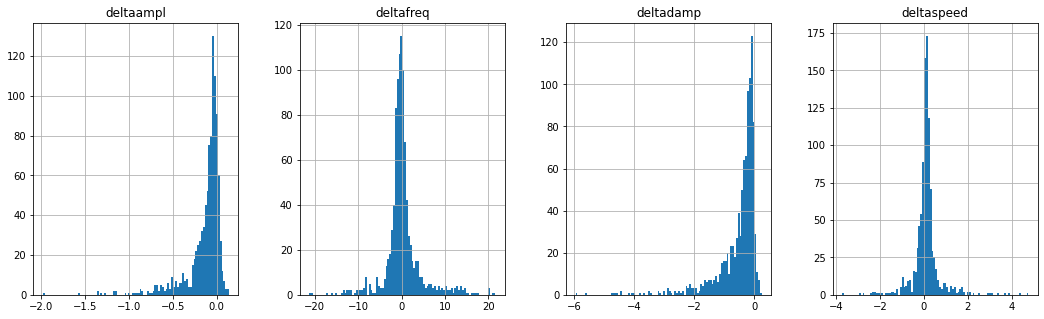

In [171]:
fig, axes = plt.subplots(1, 4, figsize=(18,5))
for col, axis in zip(delta.columns, axes):
    delta.hist(column = col, bins = 100, ax=axis)

In [179]:
def plot_delta(df1, df_delta, df_pred):
    title = ['Amplitudes', 'Frequencies', 'Daping coeffitients', 'Speed']
    col = [x for x in df1.columns]
    col_delta = [x for x in df_delta.columns]
    col_pred = [x for x in df_pred.columns]
    coloru = [x for x in ['r', 'g', 'b', 'm']]
    
    for i, j, color, tit in zip(col, col_delta, coloru, title):
        plt.figure()
        plt.plot(df1[i], df_delta[j], 'o', color=color)
        plt.xlabel(i)
        plt.ylabel(j)
        plt.title(tit)
        plt.show()

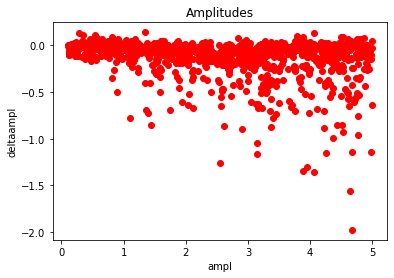

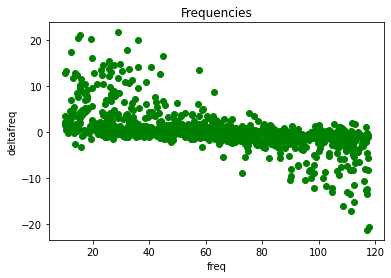

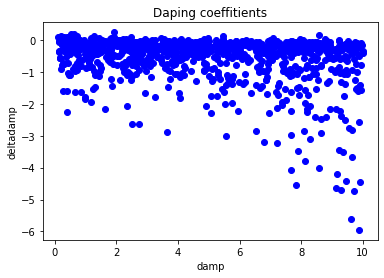

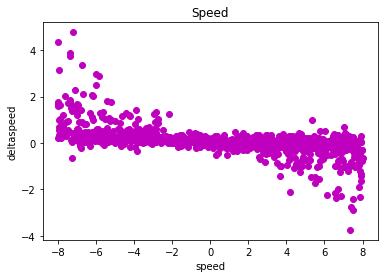

In [180]:
plot_delta(y_test, delta, df_y_pred)

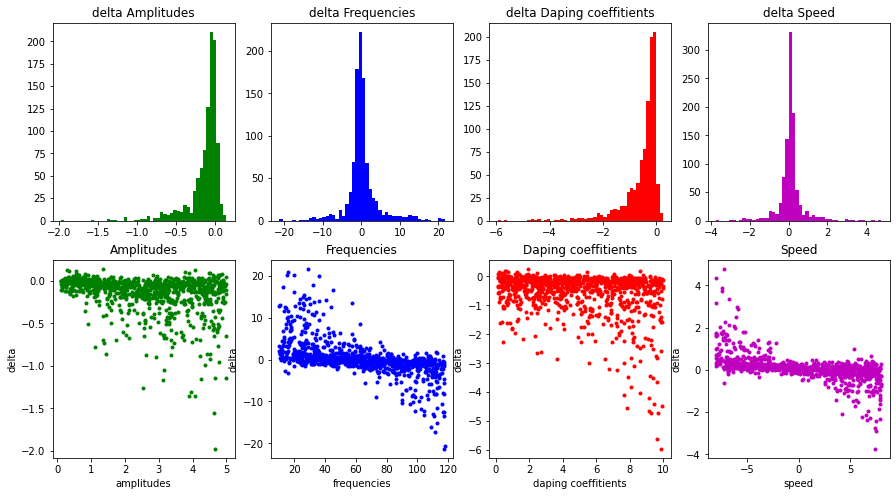

In [174]:
fig, axes = plt.subplots(2, 4, figsize=(15,8))
ax = axes[0][0]
ax.hist(delta['deltaampl'], bins=50, color='g')
ax.set_title('delta Amplitudes')
ax = axes[0][1]
ax.hist(delta['deltafreq'], bins=50, color='b')
ax.set_title('delta Frequencies')
ax = axes[0][2]
ax.hist(delta['deltadamp'], bins=50, color='r')
ax.set_title('delta Daping coeffitients')
ax = axes[0][3]
ax.hist(delta['deltaspeed'], bins=50, color='m')
ax.set_title('delta Speed')

ax = axes[1][0]
ax.plot(y_test['ampl'], delta['deltaampl'], 'o', ms=3, color='g')
ax.set_xlabel('amplitudes')
ax.set_ylabel('delta')
ax.set_title('Amplitudes')
ax = axes[1][1]
ax.plot(y_test['freq'], delta['deltafreq'], 'o', ms=3, color='b')
ax.set_xlabel('frequencies')
ax.set_ylabel('delta')
ax.set_title('Frequencies')
ax = axes[1][2]
ax.plot(y_test['damp'], delta['deltadamp'], 'o', ms=3, color='r')
ax.set_xlabel('daping coeffitients')
ax.set_ylabel('delta')
ax.set_title('Daping coeffitients')
ax = axes[1][3]
ax.plot(y_test['speed'], delta['deltaspeed'], 'o', ms=3, color='m')
ax.set_xlabel('speed')
ax.set_ylabel('delta')
ax.set_title('Speed')

plt.show()

In [177]:
def sns_plot(df1, df_pred):
    col = [x for x in df1.columns]
    col_pred = [x for x in df_pred.columns]
    coloru = [x for x in ['r', 'g', 'b', 'm']]
    
    for i ,j, color in zip(col, col_pred, coloru):
        sns.jointplot(x=df1[i], y=df_pred[j], color=color)

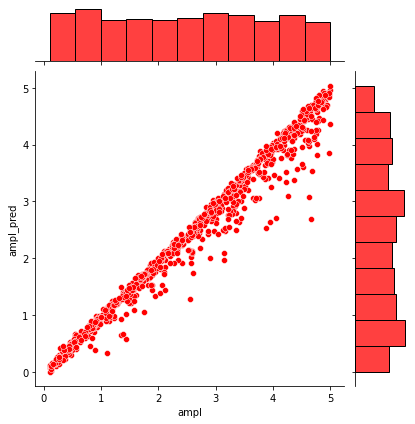

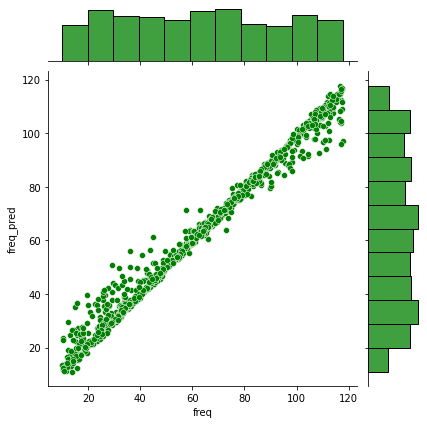

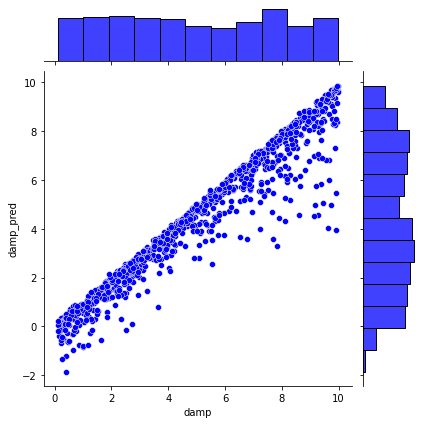

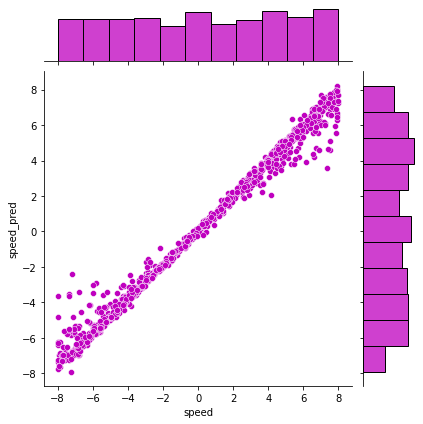

In [178]:
sns_plot(y_test, df_y_pred)